In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_csv('200511COVID19MEXICO.csv', encoding = 'latin1')

In [4]:
df_t1= df[['FECHA_SINTOMAS', 'ENTIDAD_RES', 'FECHA_DEF']]

In [7]:
df_t1 = df_t1.loc[(df_t1['ENTIDAD_RES'] == 26)]

In [13]:
df_t1.groupby('FECHA_SINTOMAS').count()[['ENTIDAD_RES', 'FECHA_DEF']]

,ENTIDAD_RES,FECHA_DEF
FECHA_SINTOMAS,,
2020-01-02,2,2
2020-01-06,3,3
2020-01-10,3,3
2020-01-11,4,4
2020-01-12,1,1
...,...,...
2020-05-06,76,76
2020-05-07,53,53
2020-05-08,28,28


In [19]:
df_t1 = df_t1.reset_index(drop = 'true')

In [20]:
df_t1.groupby('FECHA_SINTOMAS').FECHA_DEF.nunique()

FECHA_SINTOMAS
2020-01-02    1
2020-01-06    1
2020-01-10    1
2020-01-11    1
2020-01-12    1
             ..
2020-05-06    1
2020-05-07    1
2020-05-08    2
2020-05-09    1
2020-05-10    1
Name: FECHA_DEF, Length: 102, dtype: int64

In [21]:
df_t1['FECHA_DEF'].values

array(['9999-99-99', '9999-99-99', '9999-99-99', ..., '9999-99-99',
       '9999-99-99', '9999-99-99'], dtype=object)

In [38]:
import numpy as np

In [41]:
df_t1['FALLECIMIENTO'] = np.where(df_t1['FECHA_DEF']=='9999-99-99', 0, 1)

In [46]:
df_t1.groupby(['FECHA_SINTOMAS']).agg({'ENTIDAD_RES': "count", 'FALLECIMIENTO': "sum"})

,ENTIDAD_RES,FALLECIMIENTO
FECHA_SINTOMAS,,
2020-01-02,2,0
2020-01-06,3,0
2020-01-10,3,0
2020-01-11,4,0
2020-01-12,1,0
...,...,...
2020-05-06,76,0
2020-05-07,53,0
2020-05-08,28,1


In [49]:
table1 = df_t1.groupby(['FECHA_SINTOMAS']).agg({'ENTIDAD_RES': "count"
                                                , 'FALLECIMIENTO': "sum"})

In [53]:
table1.columns = ['Confirmados','Decesos']

In [56]:
table1.to_csv('tabla1_rev.csv')

In [92]:
df_t2 = df[['FECHA_SINTOMAS', 'ENTIDAD_RES', 'TIPO_PACIENTE']]

In [93]:
df_t2 = df_t2.loc[((df_t2['ENTIDAD_RES'] == 26) | (df_t2['ENTIDAD_RES'] == 19) 
           | (df_t2['ENTIDAD_RES'] == 8) | (df_t2['ENTIDAD_RES'] == 21)) & (df_t2['TIPO_PACIENTE'] == 2)]

In [94]:
df_t2['Estado'] = np.where(df_t2['ENTIDAD_RES']== 26, 'Sonora' , 'Otro')

In [95]:
df_t2['Estado'] = np.select([
    df_t2['ENTIDAD_RES'] == 26,
    df_t2['ENTIDAD_RES'] == 21,
    df_t2['ENTIDAD_RES'] == 19,
    df_t2['ENTIDAD_RES'] == 8],
                            ['Sonora', 'Puebla', 'Nuevo León', 'Chihuahua'], default='Otro')                      

In [105]:
df_t2


In [108]:
table2 = df_t2.groupby(['Estado']).agg('count')

In [115]:
del table2['ENTIDAD_RES']

In [117]:
del table2['TIPO_PACIENTE']

In [118]:
table2

,FECHA_SINTOMAS
Estado,
Chihuahua,1013
Nuevo León,1065
Puebla,1295
Sonora,604


In [120]:
table2.columns = ['Pacientes']

In [121]:
table2.to_csv('tabla2_rev.csv')

In [77]:
graf1 = df_t2['Estado'].value_counts()

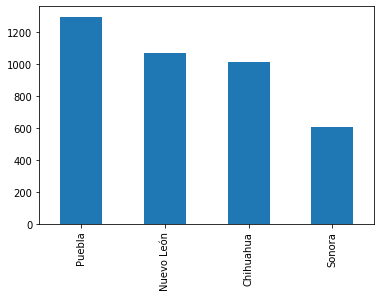

In [80]:
graf1.plot.bar()
plt.savefig('grafica1_rev.png')
plt.show()

In [97]:
df_t3= df[['FECHA_SINTOMAS', 'ID_REGISTRO']]

In [98]:
df_t3 =df_t3.groupby(['FECHA_SINTOMAS']).count()

In [99]:
df_t3.columns = ['Casos']

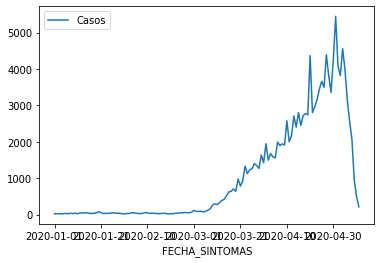

In [101]:
df_t3.plot.line()


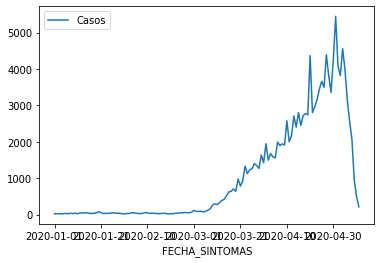

In [104]:
df_t3.plot.line()
plt.savefig('grafica2_rev.png')
plt.show()